* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-09-21


In [2]:
import pandas as pd
import numpy as np

In [3]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   84   56  113  114  124   143  182  320  142  167  297  240  125
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2  155  177  264  169   87   178  216  350  184  258  328  179  343,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    84   56  113  114  124  143
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   182  320  142  167  297  240
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4   125  155  177  264  169   87
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6   178  216  350  184  258  328
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   179  343  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  관악구 소재 사우나  강남구 소재 대우디오빌  강남구 통신 판매업  강남구 동훈산업개발  건축 설명회 관련  \
 0  4995     409           9            16           7          13          8   
 
    강남구 K보건 산업  서대문구 세브란스 병원  서울지방 국세청 관련  ...  영등포 지인 모임  성북구 사랑제일교회  \
 0          32            35            4  ...         14         641   
 
    8·15 서울도심 집회  광진구 혜민 병원  송파구 쿠팡 관련  강동구 BF모바일 콜센터  영등포구 일련정종 서울포교소

In [5]:
# index the table with covid19 patient data
tables[-2]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4995,23042,9.20.,타시도,-,확인 중,NaN
1,4994,23024,9.20.,서초,-,강남구 소재 대우디오빌,NaN
2,4993,23016,9.20.,기타,-,해외 접촉 추정,NaN
3,4992,23027,9.20.,타시도,-,관악구 소재 사우나,NaN
4,4991,23026,9.20.,관악구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
4990,5,9,1.31.,성북구,-,#5 접촉,퇴원
4991,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
4992,3,6,1.30.,종로구,-,#3 접촉,퇴원
4993,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [6]:
# get number of confirmed cases and numbers of columns
df = tables[-2]
df.shape

(4995, 7)

In [7]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4995,23042,9.20.,타시도,-,확인 중,NaN
1,4994,23024,9.20.,서초,-,강남구 소재 대우디오빌,NaN
2,4993,23016,9.20.,기타,-,해외 접촉 추정,NaN
3,4992,23027,9.20.,타시도,-,관악구 소재 사우나,NaN
4,4991,23026,9.20.,관악구,-,기타 확진자 접촉,NaN


In [8]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'9_20_'

In [9]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_9_20_.csv'

In [10]:
df.to_csv(file_path, index=False)

In [11]:
# reed the covid dataset
df = pd.read_csv(file_path)

In [12]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4995,23042,9.20.,타시도,-,확인 중,NaN
1,4994,23024,9.20.,서초,-,강남구 소재 대우디오빌,NaN
2,4993,23016,9.20.,기타,-,해외 접촉 추정,NaN
3,4992,23027,9.20.,타시도,-,관악구 소재 사우나,NaN
4,4991,23026,9.20.,관악구,-,기타 확진자 접촉,NaN
5,4990,23025,9.20.,관악구,-,기타 확진자 접촉,NaN
6,4989,23032,9.20.,구로구,-,기타 확진자 접촉,NaN
7,4988,22994,9.20.,노원구,-,기타 확진자 접촉,NaN
8,4987,23008,9.20.,노원구,-,기타 확진자 접촉,NaN
9,4986,23033,9.20.,구로구,-,기타 확진자 접촉,NaN


In [13]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(691, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
2529,2466,16232,8.19.,동작구,-,기타 확진자 접촉,퇴원
477,4518,21635,9.09.,도봉구,-,기타 확진자 접촉,NaN
601,4394,21356,9.07.,중랑구,-,기타 확진자 접촉,NaN
78,4917,22821,9.18.,양천구,-,기타 확진자 접촉,NaN
790,4205,20879,9.04.,서대문구,-,기타 확진자 접촉,퇴원
127,4868,22727,9.17.,광진구,-,기타 확진자 접촉,NaN
2002,2993,17741,8.24.,은평구,-,기타 확진자 접촉,퇴원
3168,1827,14992,8.14.,은평구,-,기타 확진자 접촉,퇴원
943,4052,20110,8.31.,도봉구,-,기타 확진자 접촉,퇴원
2248,2747,16966,8.21.,광진구,-,기타 확진자 접촉,퇴원


In [14]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(df_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.sample(5)

number of patients incurred from church: 20%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
3711,1284,12648,6.26.,관악구,-,왕성교회 관련,퇴원
2542,2453,16228,8.19.,송파구,-,용인시 우리제일교회 관련,퇴원
4948,47,1253,2.26.,강남구,-,신천지대구교회 관련,퇴원
2479,2516,17921,8.20.,성동구,-,성북구 사랑제일교회 관련,퇴원
2745,2250,15928,8.18.,성북구,-,성북구 사랑제일교회 관련,퇴원


In [15]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 7%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
251,4744,22448,9.15.,동작구,-,송파구 우리교회,NaN
265,4730,22341,9.14.,송파구,-,송파구 교회 관련,NaN
268,4727,22353,9.13.,송파구,-,송파구 교회 관련,NaN
269,4726,22354,9.14.,송파구,-,송파구 교회 관련,NaN
270,4725,22342,9.13.,강남구,-,송파구 교회 관련,NaN


In [16]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
2.7.       1
1.24.      1
4.20.      1
3.3.       1
2.6.       1
Name: 확진일, Length: 213, dtype: int64

In [17]:
df["확진일"].head(4)

0    9.20.
1    9.20.
2    9.20.
3    9.20.
Name: 확진일, dtype: object

In [18]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-09-20
1   2020-09-20
2   2020-09-20
3   2020-09-20
4   2020-09-20
Name: 확진일자, dtype: datetime64[ns]

In [19]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [20]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [21]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4995,23042,9.20.,타시도,-,확인 중,NaN,2020-09-20,9,38,09-20
1,4994,23024,9.20.,서초,-,강남구 소재 대우디오빌,NaN,2020-09-20,9,38,09-20
2,4993,23016,9.20.,기타,-,해외 접촉 추정,NaN,2020-09-20,9,38,09-20


## Visualization

In [22]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [23]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

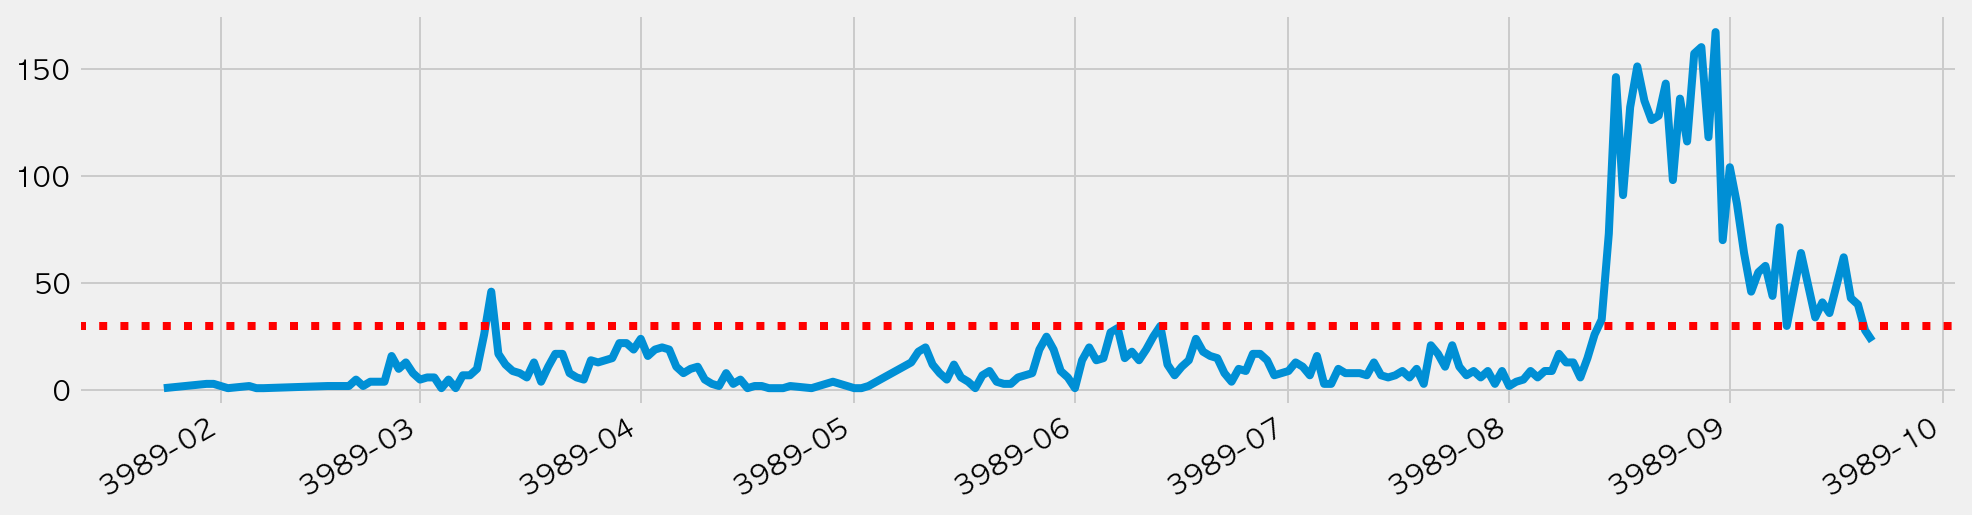

In [24]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [25]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4995,23042,9.20.,타시도,-,확인 중,NaN,2020-09-20,9,38,09-20
1,4994,23024,9.20.,서초,-,강남구 소재 대우디오빌,NaN,2020-09-20,9,38,09-20
2,4993,23016,9.20.,기타,-,해외 접촉 추정,NaN,2020-09-20,9,38,09-20
3,4992,23027,9.20.,타시도,-,관악구 소재 사우나,NaN,2020-09-20,9,38,09-20
4,4991,23026,9.20.,관악구,-,기타 확진자 접촉,NaN,2020-09-20,9,38,09-20
5,4990,23025,9.20.,관악구,-,기타 확진자 접촉,NaN,2020-09-20,9,38,09-20
6,4989,23032,9.20.,구로구,-,기타 확진자 접촉,NaN,2020-09-20,9,38,09-20
7,4988,22994,9.20.,노원구,-,기타 확진자 접촉,NaN,2020-09-20,9,38,09-20
8,4987,23008,9.20.,노원구,-,기타 확진자 접촉,NaN,2020-09-20,9,38,09-20
9,4986,23033,9.20.,구로구,-,기타 확진자 접촉,NaN,2020-09-20,9,38,09-20


In [26]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    212.000000
mean      23.561321
std       34.974209
min        1.000000
25%        6.000000
50%       11.000000
75%       20.250000
max      167.000000
Name: 월일, dtype: float64

In [27]:
# get 10 days of recent confirmed cases
day_count[-10:]

09-11    49
09-12    34
09-13    41
09-14    36
09-15    49
09-16    62
09-17    43
09-18    40
09-19    28
09-20    23
Name: 월일, dtype: int64

In [28]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [29]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-24"]
df_day.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1035,3960,18896,8.24.,타시도,-,동작구 진흥글로벌,NaN,2020-08-24,8,35,08-24
1611,3384,17889,8.24.,타시도,-,다래경매 관련,퇴원,2020-08-24,8,35,08-24
1875,3120,17828,8.24.,노원구,-,확인 중,NaN,2020-08-24,8,35,08-24
1876,3119,17903,8.24.,성동구,-,8.15서울도심집회,NaN,2020-08-24,8,35,08-24
1877,3118,17913,8.24.,광진구,-,8.15서울도심집회,NaN,2020-08-24,8,35,08-24
1878,3117,17876,8.24.,광진구,-,확인 중,퇴원,2020-08-24,8,35,08-24
1879,3116,17866,8.24.,광진구,-,확인 중,퇴원,2020-08-24,8,35,08-24
1880,3115,17656,8.24.,타시도,-,타시도 확진자 접촉,퇴원,2020-08-24,8,35,08-24
1881,3114,17618,8.24.,광진구,-,확인 중,퇴원,2020-08-24,8,35,08-24
1882,3113,17598,8.24.,타시도,-,8.15서울도심집회,NaN,2020-08-24,8,35,08-24


In [30]:
# Covid19 infection classified with patients' contact to the disease
number_of_paths = len(df["접촉력"].unique()) # get unique value for types of contagion route 
print(f"Total number of paths for infection: {number_of_paths}")
df["접촉력"].unique()

Total number of paths for infection: 247


array(['확인 중', '강남구 소재 대우디오빌', '해외 접촉 추정', '관악구 소재 사우나', '기타 확진자 접촉',
       '타시도 확진자 접촉', '강남구 통신판매업', '강남구 동훈산업개발', '양천구 양천경찰서', '은평구 수색성당',
       '강남구 K보건산업', '건축설명회', '서대문구 세브란스병원', '서울지방국세청 관련', '수도권 지인모임',
       '서대문구 소재 세브란스병원', '서대문구 세브란스 병원', '성남 서호주간센터', '서대문구 지인모임',
       '영등포 지인모임', '송파구 우리교회', '송파구 교회 관련', '관악구 판매업소 관련', '광진구 혜민병원',
       '8.15서울도심집회', '도봉구 건설현장', '도봉구 운동시설', '송파구 쿠팡 관련', '종로구청 관련',
       '노원구 빛가온교회 관련', '동작구 요양시설 관련', '서초구 장애인교육시설', '강동구 BF모바일 관련',
       '영등포구 일련정종 서울포교소', '동작구 진흥글로벌', '구로구 아파트 관련', 'KT가좌지사 관련',
       '성북구 사랑제일교회 관련', '노원구 기도모임', '관악구 가족모임', '영등포구 국회출입기자관련',
       '은평구 헤어콕 관련', '송파구 소재병원', '극단 산 관련', '영등포구 권능교회', '강동구 소재 병원',
       '다래경매 관련', '성북구 체대입시 관련', '성북구 요양시설', '중구소재 은행 관련', '중랑구 소재 체육시설',
       '동작구 소재 서울신학교', '용인시 우리제일교회 관련', '노원구 손해보험 관련', '구로구 보성운수',
       '강서구 서울대효요양병원', '강북구 일가족', '강서구 보안회사', '롯데리아 종사자 모임', '강남구 소재 아파트',
       '제주 게스트하우스 관련', '성북구 벧엘장로교회', '관악구 김혜근의원', '동대문구 sk탁구클럽',
       '동작구 스터디카페', '군인권센터', 

In [31]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [32]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [33]:
df["접촉력"].value_counts().head(20)

확인 중             880
기타 확진자 접촉        691
성북구 사랑제일교회 관련    641
해외 접촉 추정         386
타시도 확진자 접촉       203
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
구로구 콜센터 관련        60
노원구 빛가온교회 관련      46
성북구 체대입시 관련       43
요양시설 관련           43
양천구 운동시설 관련       43
구로구 교회 관련         41
용인시 우리제일교회 관련     41
콜센터직원 접촉          37
극단 산 관련           37
수도권 개척교회 관련       37
구로구 아파트 관련        36
강남구 사무실 관련        36
Name: 접촉력, dtype: int64

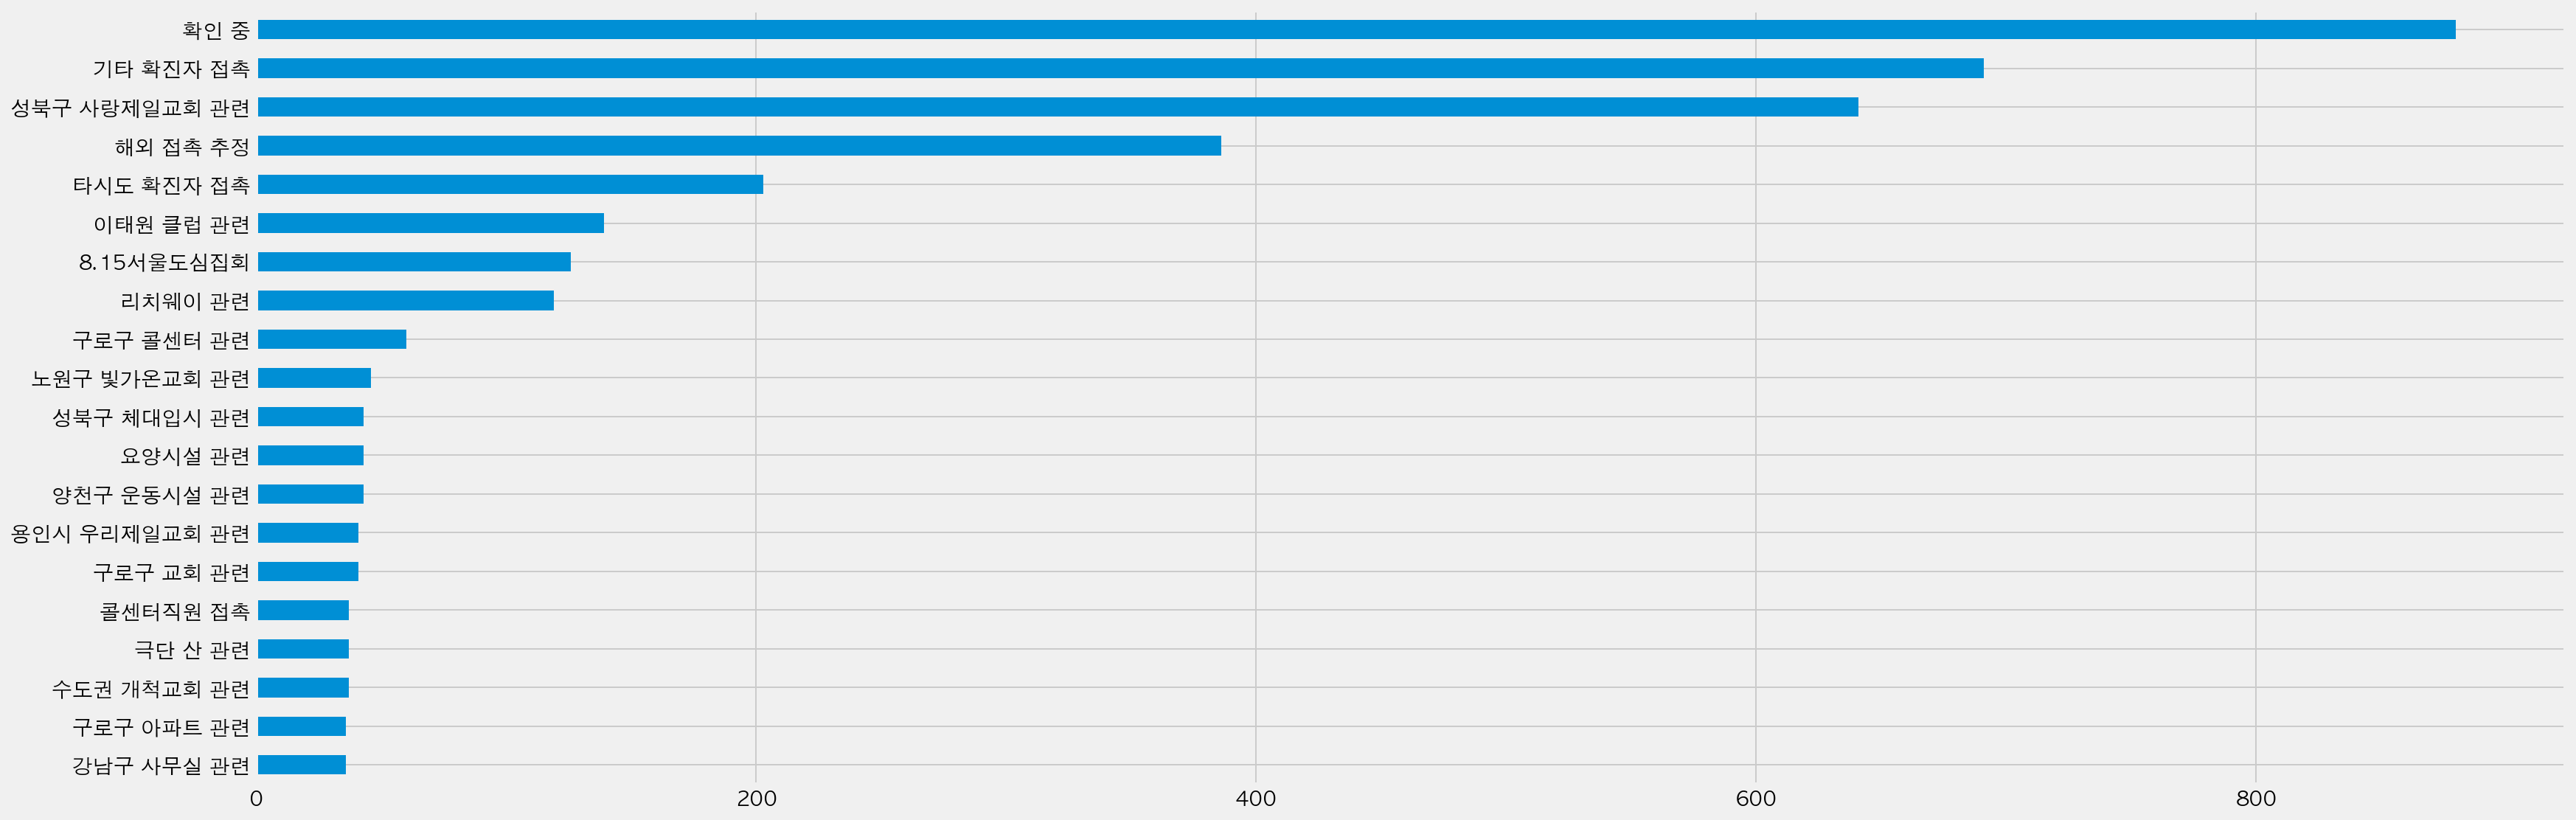

In [34]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [35]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [36]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

확인 중             880
기타 확진자 접촉        691
성북구 사랑제일교회 관련    641
해외 접촉 추정         386
타시도 확진자 접촉       203
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
구로구 콜센터 관련        60
노원구 빛가온교회 관련      46
성북구 체대입시 관련       43
요양시설 관련           43
양천구 운동시설 관련       43
구로구 교회 관련         41
용인시 우리제일교회 관련     41
Name: 접촉력, dtype: int64

In [37]:
# 
top_count_recent = df.loc[df["확진일자"]>="2020-08-12", "접촉력"].value_counts().head(10)
top_count_recent

기타 확진자 접촉        691
확인 중             675
성북구 사랑제일교회 관련    641
타시도 확진자 접촉       152
8.15서울도심집회       126
노원구 빛가온교회 관련      46
해외 접촉 추정          45
성북구 체대입시 관련       43
용인시 우리제일교회 관련     41
극단 산 관련           37
Name: 접촉력, dtype: int64

## 감염경로 불명

In [38]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4995,23042,9.20.,타시도,-,확인 중,NaN,2020-09-20,9,38,09-20
13,4982,23014,9.20.,성동구,-,확인 중,NaN,2020-09-20,9,38,09-20
14,4981,22991,9.20.,금천구,-,확인 중,NaN,2020-09-20,9,38,09-20
15,4980,23001,9.20.,영등포구,-,확인 중,NaN,2020-09-20,9,38,09-20
16,4979,23004,9.20.,마포구,-,확인 중,NaN,2020-09-20,9,38,09-20
...,...,...,...,...,...,...,...,...,...,...,...
4939,56,1768,2.25.,고양시,-,확인 중,퇴원,2020-02-25,2,9,02-25
4953,42,1370,2.25.,노원구,-,확인 중,퇴원,2020-02-25,2,9,02-25
4956,39,924,2.25.,평택,-,확인 중,퇴원,2020-02-25,2,9,02-25
4957,38,907,2.25.,관악구,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

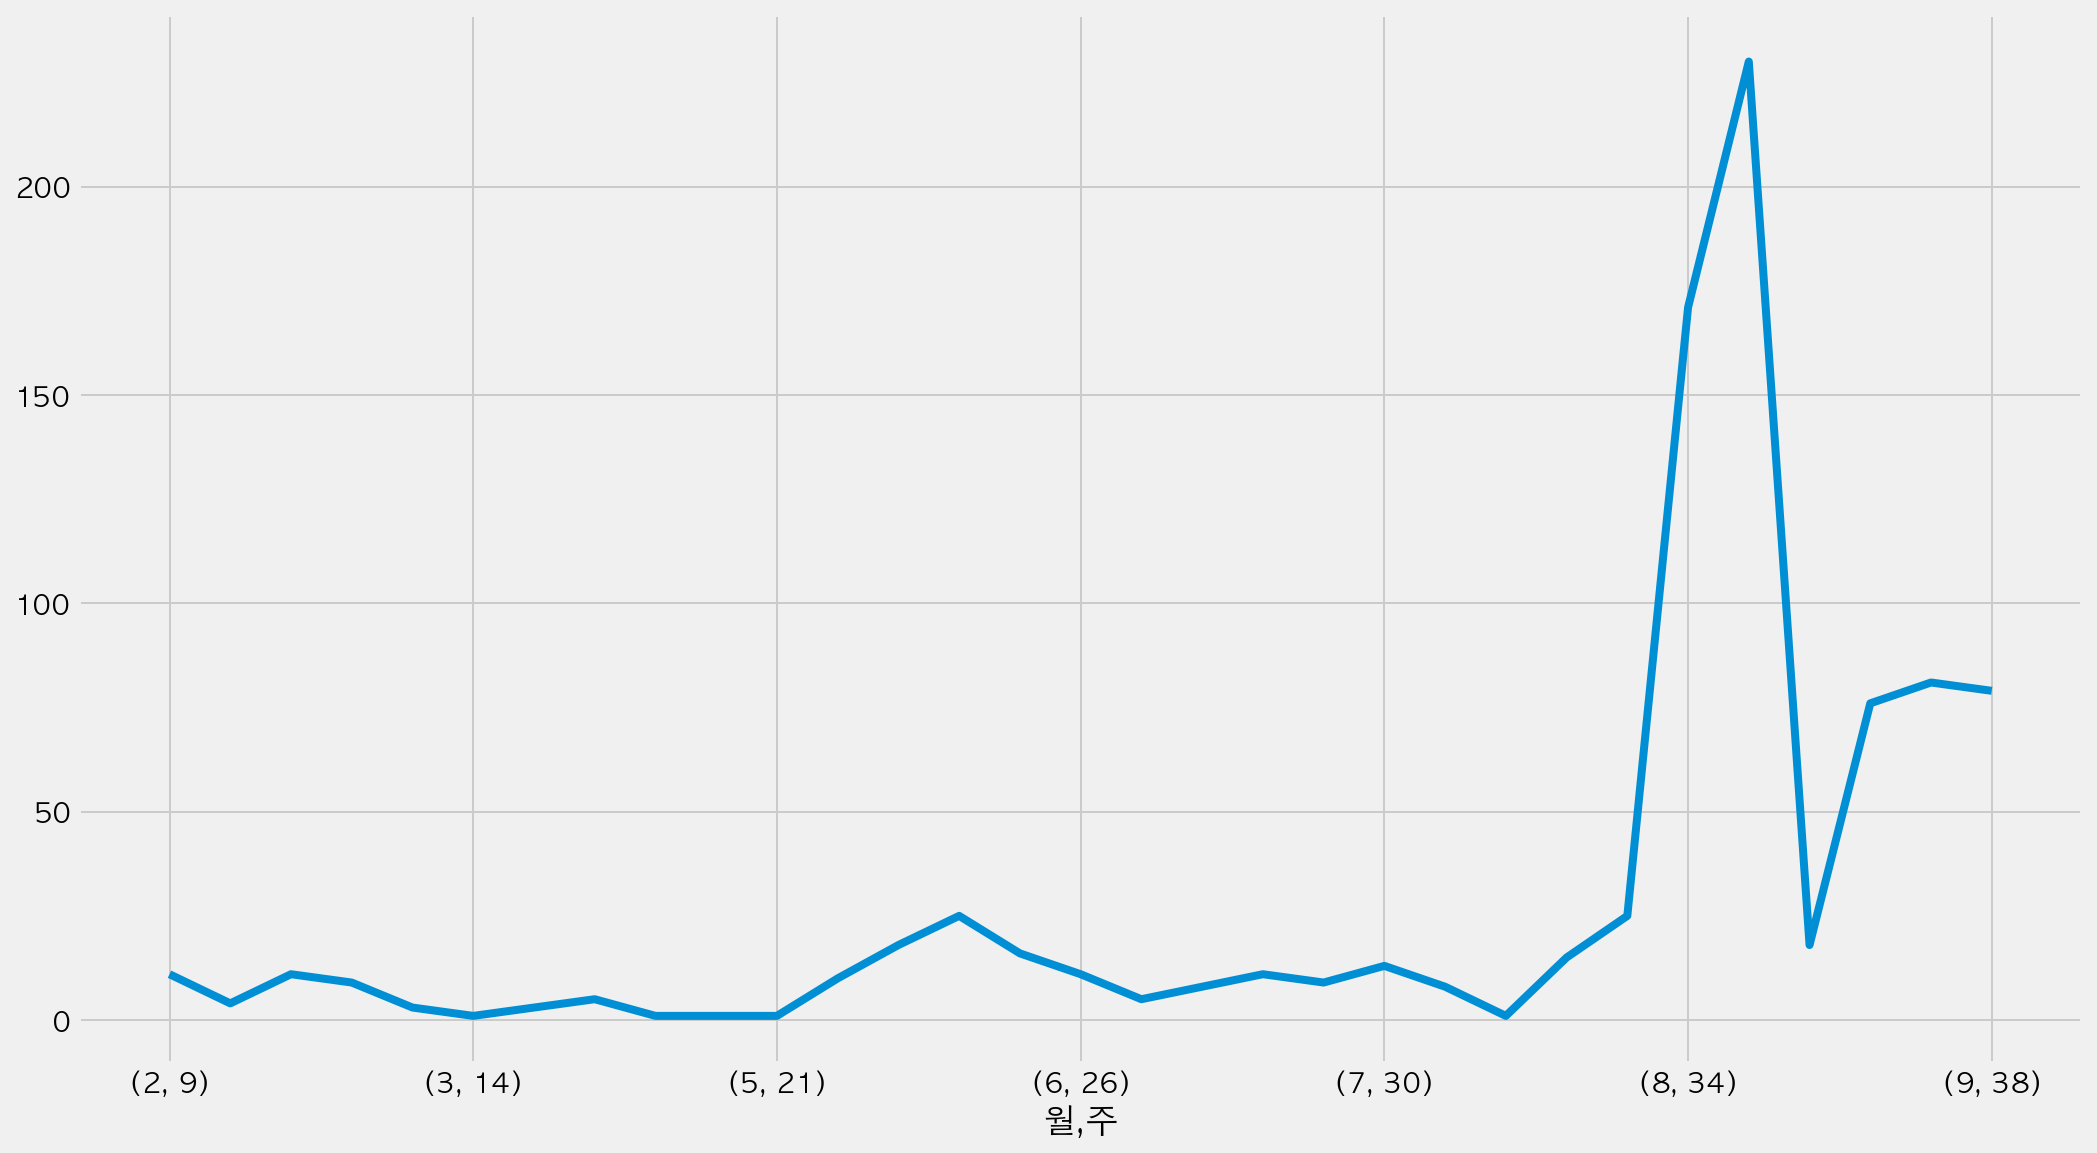

In [39]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [40]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
35,924
34,913
36,458
33,390
37,341


In [41]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
35,230
34,171
36,94
37,81
38,79


In [42]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [43]:
comparison[-4:]

,전체확진자수,불명확진수
35,924,230
36,458,94
37,341,81
38,281,79


<AxesSubplot:>

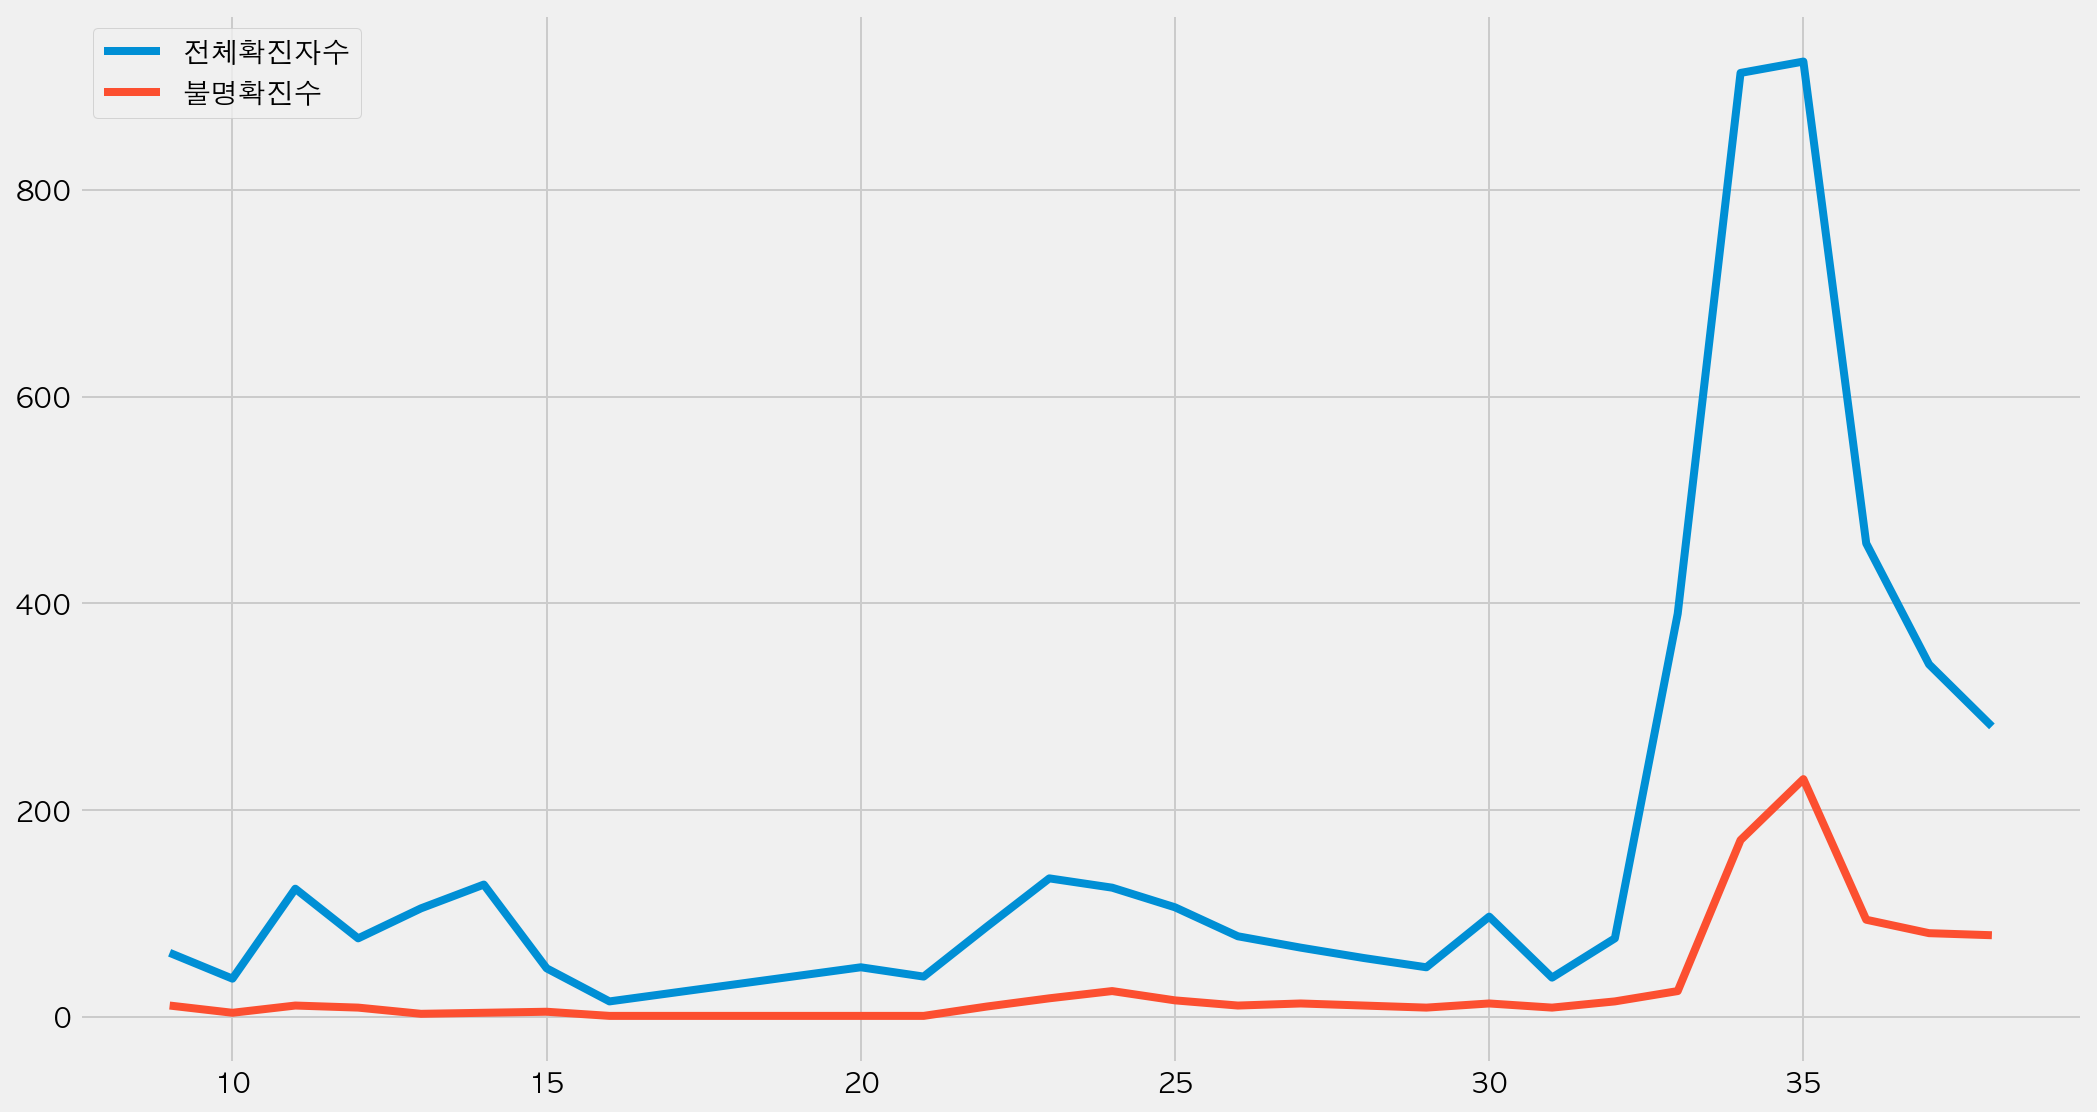

In [44]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [45]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [46]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    13.402062
31    23.684211
32    19.736842
33     6.410256
34    18.729463
35    24.891775
36    20.524017
37    23.753666
38    28.113879
dtype: float64

In [47]:
percentages[-4:]

35    24.891775
36    20.524017
37    23.753666
38    28.113879
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
18.729463307776562
24.891774891774894
20.52401746724891
23.75366568914956
28.11387900355872


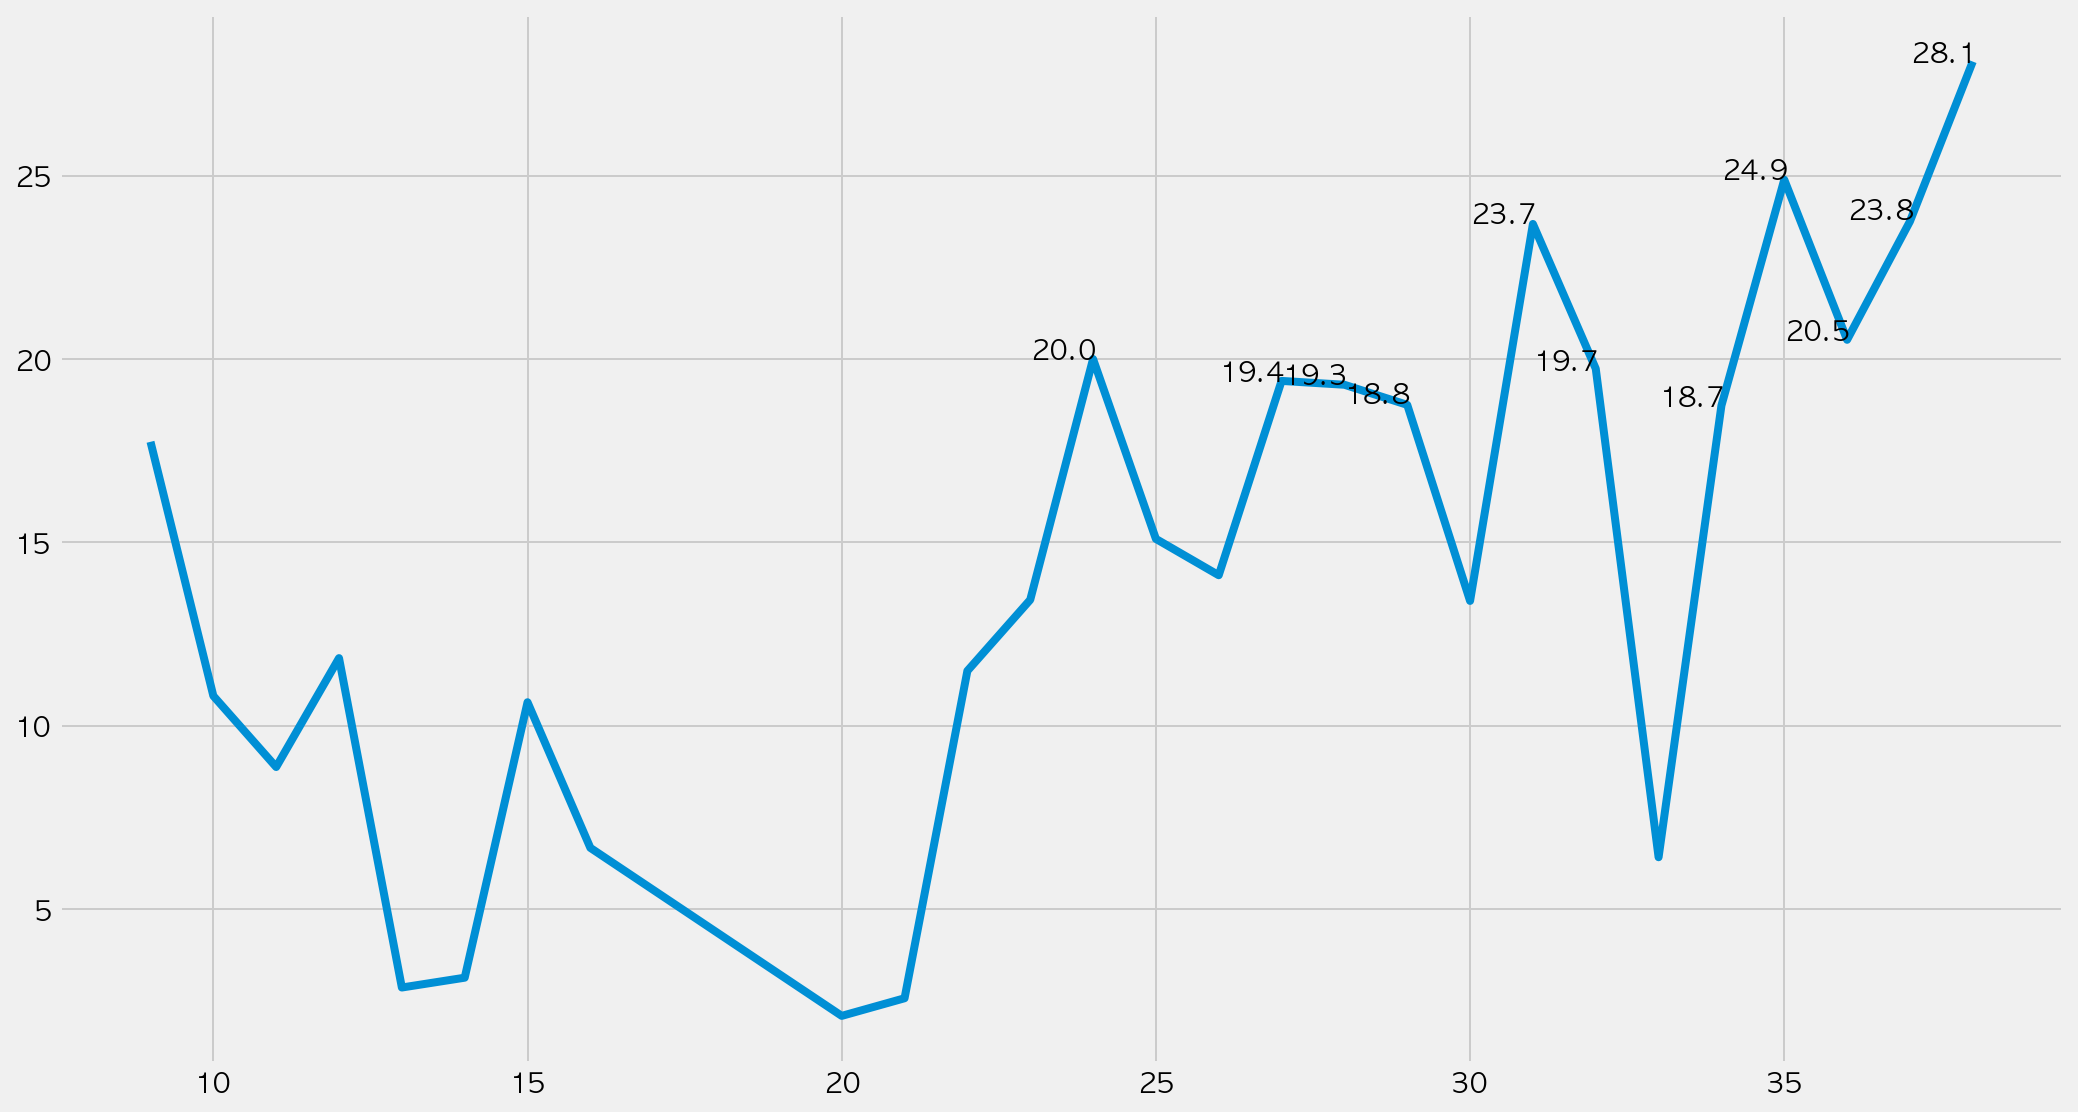

In [48]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [49]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')